# BMI565 - Bioinformatics Programming & Scripting

## Interactive Data Visualizations with Ipython Widgets

### Table of Contents

1. [Introduction](#Introduction)
    * Dependencies
    * Installation
    * Setup
2. [Ipython Widgets](#Ipython-Widgets)
    * Some Basic Widgets
    * Widgets To Filter
    * Widgets To Select
    * Creating Interactivity
    * Simplifying Interactivity
    * Custom Widgets
3. [Motivational Example: Malignant or Benign?](#Motivational-Example:-Malignant-or-Benign?)
    * Load Data into Pandas
    * Initializing & Re-Rendering Visualizations
    * Bringing It All Together
4. [In-Class Exercises](#In---Class-Exercises)
5. [Reference](#Reference)

### Introduction

During the course of an exploratory data analysis (EDA) we often generate numerous data visualizations, which we could describe simply as *exploratory data visualizations*. Once our EDA is complete and we have conducted our principle analysis, we'll have hopefully gained a handful of insights that we find valuable and would like to communicate to a larger audience of our peers or perhaps even the general public. As with an EDA, the communication of results is often greatly facilitated by visualization. Often, just a handful of plots and a paragraph can provide a powerful distillation of the major findings from a dataset. 

With that in mind, once we have the results of our study, the purpose of data visualization shifts from **exploratory** to **explanatory**. For the latter, the basic approach can be to select a few plots from the EDA that highlight the core findings of a study. Usually, however, the additional step of generating bespoke visualizations that are illustrative of specific findings will be required. 

For *explanatory data visualization*, interactivity can be used to create compelling visualizations that engage a user and invite them to explore the results themselves through their web browser. By making visualizations interactive, we can both improve the quality of a visualization in terms of it's ability to engage a viewer while also making visualization more informative. 

#### Dependencies

The following dependencies are required to run this notebook. Note that the version numbers are primarily for reference; exact library versions are unlikely to be required.

1. Python
    * Python 3.x
2. Python Libraries
    * Pandas 0.20.3
    * Jupyter 1.0.0
    * Ipywidgets 6.0.0
    * MPLD3 0.3
    
#### Installation
If you don't have the above libraries installed, paste & run the following commands into your terminal. 

```bash
pip3 install pandas==0.20.3  # Pandas (Introduces DataFrame data structure, similar to R)
pip3 install jupyter==1.0.0  # Jupyter Notebook
pip3 install ipywidgets==6.0.0 # Ipywidgets
pip3 install mpld3==0.3
jupyter nbextension enable --py --sys-prefix widgetsnbextension  # Ipywidgets - Extension Setup Step
```
*Use `pip` instead of `pip3` if using Python 2*

#### Setup

In [3]:
# Render Plots Inline
%matplotlib notebook

# Imports: Standard Library
import re as Rgx
import math as Math

# Imports: Third Party
import pandas as Pandas
import matplotlib.pyplot as Plot
import mpld3 as D3
import statsmodels as Stats
from ipywidgets import widgets, interact

### Ipython Widgets

Ipython widgets provide a way to introduce interactivity into notebooks. The widgets are implemented with HTML (structure), CSS (styling), and JavaScript (action) and encapsulate specific UI functionalities.

In [4]:
sorted(widgets.Widget.widget_types)

['Jupyter.Accordion',
 'Jupyter.BoundedFloatText',
 'Jupyter.BoundedIntText',
 'Jupyter.Box',
 'Jupyter.Button',
 'Jupyter.ButtonStyle',
 'Jupyter.Checkbox',
 'Jupyter.ColorPicker',
 'Jupyter.Controller',
 'Jupyter.ControllerAxis',
 'Jupyter.ControllerButton',
 'Jupyter.DatePicker',
 'Jupyter.Dropdown',
 'Jupyter.FloatProgress',
 'Jupyter.FloatRangeSlider',
 'Jupyter.FloatSlider',
 'Jupyter.FloatText',
 'Jupyter.HBox',
 'Jupyter.HTML',
 'Jupyter.HTMLMath',
 'Jupyter.Image',
 'Jupyter.IntProgress',
 'Jupyter.IntRangeSlider',
 'Jupyter.IntSlider',
 'Jupyter.IntText',
 'Jupyter.Label',
 'Jupyter.Play',
 'Jupyter.ProgressStyle',
 'Jupyter.RadioButtons',
 'Jupyter.Select',
 'Jupyter.SelectMultiple',
 'Jupyter.SelectionSlider',
 'Jupyter.SliderStyle',
 'Jupyter.Tab',
 'Jupyter.Text',
 'Jupyter.Textarea',
 'Jupyter.ToggleButton',
 'Jupyter.ToggleButtons',
 'Jupyter.VBox',
 'Jupyter.Valid',
 'jupyter.DirectionalLink',
 'jupyter.Link']

We can think of certain widgets as being amenable to certain types of manipulation of a data model. For example:

* **Button** and **Radio Button** widgets can be used to toggle a visualization feature, such as an optional regression line on a scatter plot
* **Slider** and **Ranged Slider** widgets can be used to filter values or date ranges
* **Toggle** and **Dropdown** widgets can be used to select specific data columns or datasets. 
* **Image** and **HTML** widgets can be used to build out user interfaces

There are also specialized widgets, such as color pickers and date pickers, which can offer a user more granular control of how a visualization is rendered and data is selected. 

#### Some Basic Widgets

##### <span style="color: gray">The Button Widget</span>

Each widget takes a set of initialization arguments that vary by widget type – ([see documentation for each widget here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)). The most basic example is perhaps a simple button element:

In [5]:
button = widgets.Button(
    description = "I'm a Button! Click me!"
)
button

Looks great, but what does it do? Nothing. Let's fix that:

In [6]:
# Define a Function for The Button to Trigger
def makeAnAnimalSound (element):
    import random
    sounds = ["moo", "squawk", "cacaw", "woof", "oink", "rawr", "meow", "bark"]
    print("%s\t" % random.sample(sounds, 1)[0], element)

button.on_click(makeAnAnimalSound)
button

This is a special case of binding a function to a widget – the button widget has a method `on_click()` that allows for a function to be triggered when it is clicked. 

##### <span style="color: gray">The Toggle Button Widget</span>

If you need to both set and unset a variable, you can use the toggle button widget.

In [7]:
button = widgets.ToggleButton(
    value=False,
    description="Activate!",
    button_style='info' # 'success', 'info', 'warning', 'danger' or ''
)
button

##### <span style="color: gray">The Checkbox Widget</span>

Basically just another `ToggleButton` widget. 

In [8]:
widgets.Checkbox(
    value=False,
    description='Please don\'t check me'
)

#### Widgets To Filter

You can use sliders to filter both integer, float, or categorical data types. Below is an example of an integer slider.

##### <span style="color: gray">The Integer Slider Widget</span>

In [9]:
slider = widgets.IntSlider(
    value = 0,
    min = -10,
    max = 10,
    step = 1,
    description = "Do you like octopi?",
    disabled = False,
    continuous_update = True,
    orientation = "horizontal",
    readout = True,
    readout_format = 'i'
)
slider

##### <span style="color: gray">The Range Slider Widget</span>
Both integer and float variants of the range slider are available.

In [10]:
slider = widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='How Big is The Fish?',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white',
    color='black'
)
slider

#### Widgets To Select

##### <span style="color: gray">The Dropdown Widget</span>
The classic dropdown.

In [11]:
widgets.Dropdown(
    options={'Rock': 1, 'Indie': 2, 'Hip Hop': 3, 'Rap': 4, 'Folk': 5, 'Country': 6, 'Bluegrass': 7, 'Classical': 8, 'Silence': 9},
    value=1,
    description="I'd Rather Listen To:",
)

##### <span style="color: gray">The Multi Select Widget</span>
For when you would like to allow the selection of combinations.

In [12]:
widgets.SelectMultiple(
    options=['Breakfast', 'Second Breakfast', 'Brunch', 'Lunch', 'Dinner', 'Second Dinner', 'Dessert All Day'],
    value=['Breakfast', 'Brunch', 'Lunch', 'Dinner', 'Second Dinner'],
    description='I Will Have...'
)

##### <span style="color: gray">The Tabs Widget</span>

In [13]:
# Import OrderedDict To Ensure Alphabetical Ordering of Tabs
from collections import OrderedDict
labels = OrderedDict(
    (
        ('A', 'Alice'), 
        ('B', 'Bob'), 
        ('C', 'Charlie'),
        ('D', 'Diane')
    )
)

tab = widgets.Tab()

# Set Names to Labels
tab.children = [widgets.Label(value) for key, value in labels.items()]
for i, key in enumerate(labels.keys()):
    tab.set_title(i, key)
tab

##### <span style="color: gray">The Toggle Buttons Widget</span>

In [14]:
toggle = widgets.ToggleButtons(
    options = ["bpm", "bmi", "systolic", "diastolic"],
    description = 'Filter:',
    disabled = False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)
toggle

#### Creating Interactivity

Widget interactivity is powered by JavaScript's [event loop architecture](https://developer.mozilla.org/en-US/docs/Web/JavaScript/EventLoop). Certain widgets have specialized event methods (e.g. `Buttons` have the `on_click` method, as seen above), however, for slider and toggle widgets, we can use the `observe` method to bind a specific action to interactions with the widget.

In [15]:
def callback (event):
    if "value" in event["new"]:
        print("%s\t\t%s" % (event["type"], event["new"]["value"]))
        
toggle.observe(callback)
print("Event Type\tNew Value")
toggle

Event Type	New Value


Above, we defined a function called `callback`, which checks for an updated filter value and prints it if it exists (along with the `change` event that triggered it). We then hand in this 'callback function' as a parameter to the `observe` method, binding interactions with the `ToggleButtons widget` to `callbacks` functionality. This architecture is not common in Python, but is the bread and butter of event-based programming in JavaScript (and many other asynchronous languages). To see more about events, see their [documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html).

#### Simplifying Interactivity
Often times, we're only concerned with the specific value of the interaction. In those cases, we can simplify the above using the `interact` method, which allows us to work with the widget data directly (rather than extracting it from the `event` dictionary, which was passed as a parameter to the `callback` method we defined above). 

In [16]:
toggle = interact(lambda x: x, x = widgets.ToggleButtons(
    options = ["bpm", "bmi", "systolic", "diastolic"],
    description = 'Filter:',
    disabled = False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
))

Here, we pass to the `interact` method a simple `lambda` function, which returns the value passed to it, and bind this to our familiar `ToggleButtons` widget. Of course we could customize the `lambda` function to, say, reverse and capitalize the string value:

In [17]:
# An Inline Function To Print A Reversed & Capitalized String
reverseAndCapitalize = lambda x: "%s >>> %s" % (x, x[::-1].upper())

toggle = interact(reverseAndCapitalize, x = widgets.ToggleButtons(
    options = ["bpm", "bmi", "systolic", "diastolic"],
    description = 'Filter:',
    disabled = False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
))

#### Custom Widgets

If you find that none of the above widgets suit your needs, the `ipywidgets` API also enables the development of [custom widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Custom.html). Before embarking down this road, its worthwhile to build an understanding of how `ipywidgets` work as it is a bit more involved – here's an [excellent tutorial](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Low%20Level.html) that focuses on just that. 

### Motivational Example: Malignant Versus Benign

Widgets enable us to build UI that allow for the interactive exploration of data sets and their visualization. To illustrate this, we'll use a dataset with 30 (continuous) breast cancer imaging features and a (categorical) dependent variable of `diagnosis` with two factor levels (malignant or benign).

The original data along with descriptions of each feature can be found on the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)" target="_blank">UCI Machine Learning Repository</a> website. 

#### Load Data into Pandas

In [18]:
# Read in Data & See Head
data = Pandas.read_csv("data/data.csv").drop(["id", "Unnamed: 32"], axis = 1)
data.head()

# Lets Make Our Visualization Look Like ggplot
Plot.style.use('ggplot')

#### Initializing & Re-Rendering a Visualization

To generate interactive data visualizations with Matplotlib, we can look at the visualization component as having two basic pieces: 
* Initialization – Where we setup the basics of the plot and `show` it. 
* Updating – Where we update the data and any associated axes, legends, labels, etc. 

Below is an example of a very basic initialization method.

In [19]:
def initPlot (groups, dependent, independent):
    """
    Method to initialize a plot, returns fig & axis, Returns Figure & Axis Objects.
    """
    # Structure Data for Matplotlib
    keys, structuredData = [], []
    for key, group in groups:
        keys.append(key)
        structuredData.append(group[independent])
    # Setup Plot Figure & Axis
    fig = Plot.figure(figsize = (8, 6))
    axis = fig.add_subplot(111)
    # Set Labels
    axis.set_xlabel(dependent)
    axis.set_ylabel(independent) 
    # Set X Axis Ticks
    axis.set_xticks([1, 2])
    axis.set_xticklabels(keys)
    # Generate Violin Plot
    axis.violinplot(structuredData)
    Plot.show(fig)
    return fig, axis

And the update function, notice the call to `Plot.cla()`, which clears the `axis` object and avoids plots rendering on top of eachother. 

In [20]:
def updatePlot (groups, dependent, independent, fig, axis):
    """
    Method to Render a Plot with a Pandas DataFrame, No Return Value.
    """
    # Important – Clear Plot Axis
    Plot.cla()
    # Structure Data for Matplotlib
    keys, structuredData = [], []
    for key, group in groups:
        keys.append(key)
        structuredData.append(group[independent])
    # Update Labels
    axis.set_xlabel(dependent)
    axis.set_ylabel(independent) 
    # Update X Axis Ticks
    axis.set_xticks([1, 2])
    axis.set_xticklabels(keys)
    # Update Title
    Plot.title("Distribution of %s by %s" % (independent, dependent))
    # Generate Violin Plot
    axis.violinplot(structuredData, showmeans = True)

#### Bringing It All Together

You may have noticed earlier that we imported a library called `mpld3`. Before rendering the interactive plot, we'll initialize this library to enable [D3.js](https://d3js.org) to handle the rendering of the plot. One of the benefits of doing so is that the plot generated by `mpld3` will be sharper than a standard `matplotlib` plot. This is because D3 by default renders the plot in scalable vector graphics (SVG, an XML-based format) rather than painting each pixel (i.e. rasterization, like a photo). 

<IPython.core.display.Javascript object>


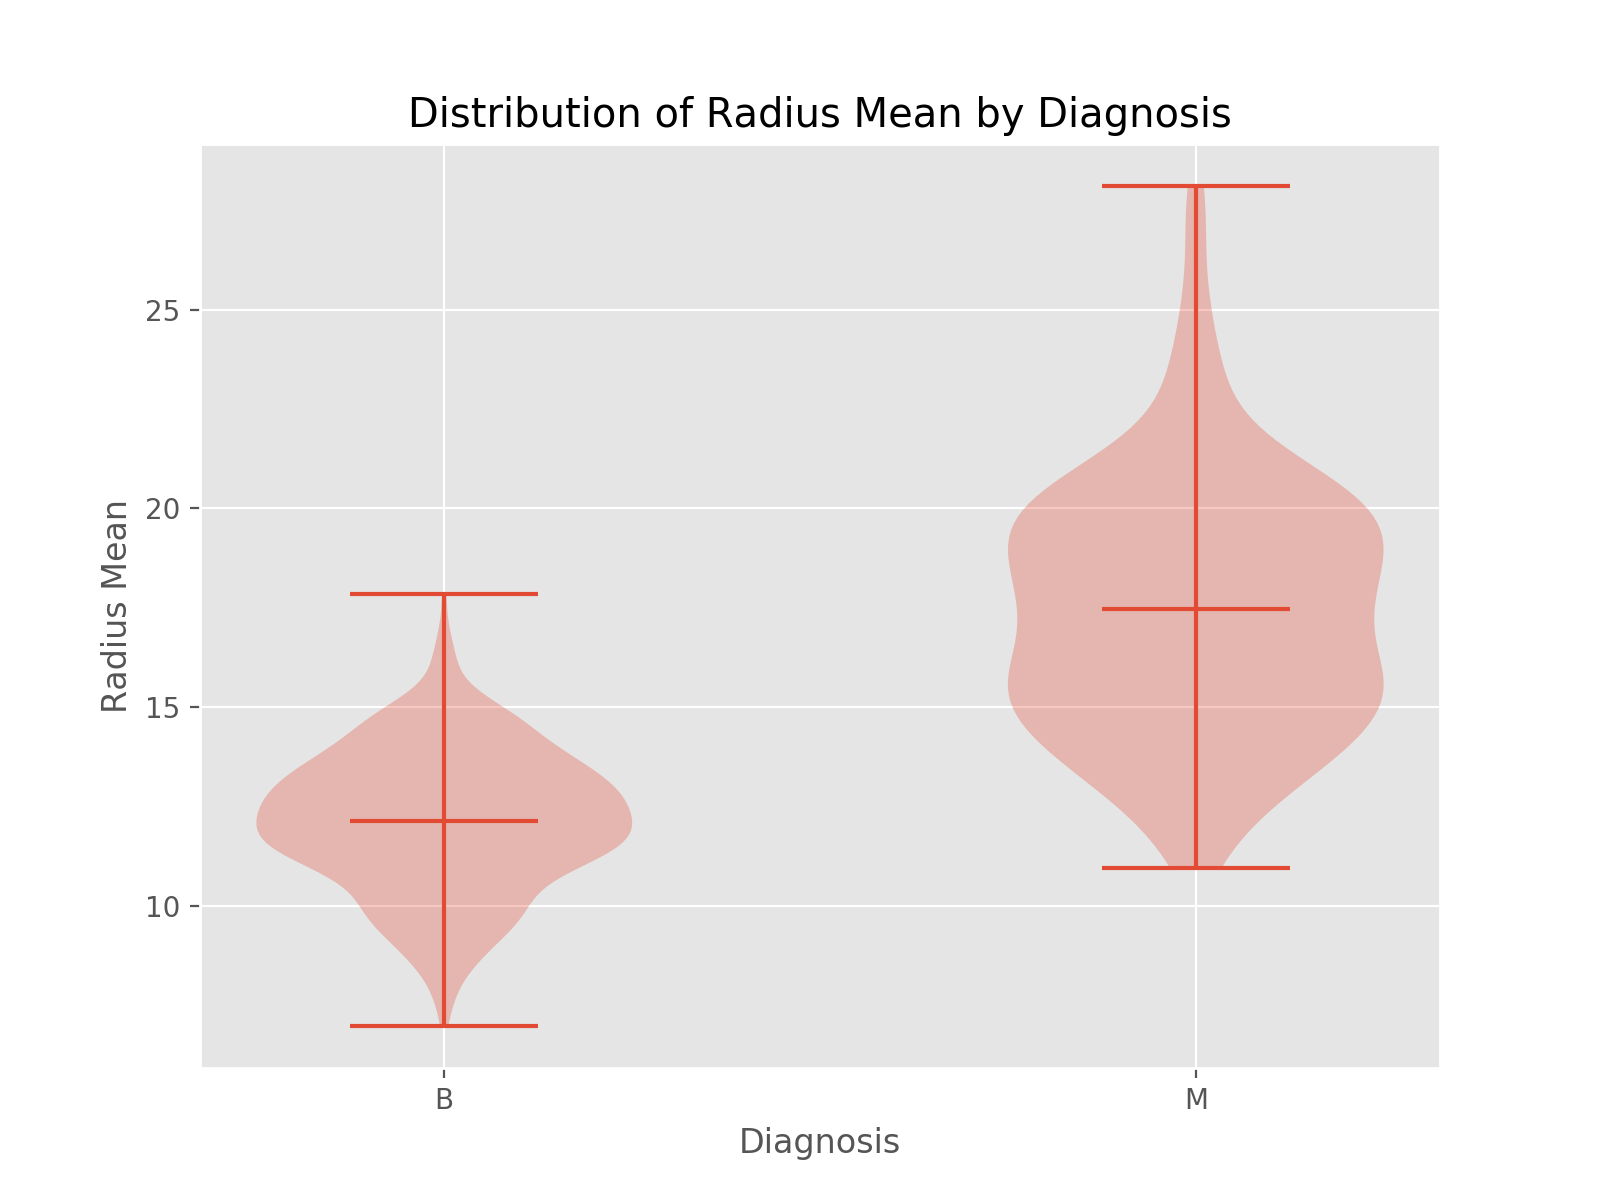

<function __main__.<lambda>>

In [22]:
# Before Plotting, We Need to Enable D3 in The Notebook
D3.enable_notebook()

# Prettify Column Names - Replace Underscores with Spaces and Capitalize the First Letter of Each Word
data.columns = [" ".join([word[0].upper() + word[1:] for word in col.split("_")]) for col in data.columns]

# Filter Columns
filterCols = list(data.columns.drop('Diagnosis'))[0:5]

# Group Data by Diagnosis
groups = data.groupby("Diagnosis")
    
# Initialize Plot
fig, axis = initPlot(groups, "Diagnosis", filterCols[0])

# Create Filter Toggle
filters = widgets.ToggleButtons(
    options = filterCols,
    description = 'Filter:',
    disabled = False,
    button_style='info',
    tooltip='Feature',
    icon='check'
)

# Bind ToggleButtons Widget Events to Rendering Function
interact(lambda x: updatePlot(groups, "Diagnosis", x, fig, axis), x = filters)

### In-Class Excercises
1. Using the available dataset, create an interactive plot that visualizes `Perimeter Mean` by `Radius Mean`. Allow the user to select samples by their `Diagnosis` using a `dropdown` widget. 

2. Create a similar plot to Exercise 1 that visualizes data for both `Diagnosis` (malignant and benign). Allow the user to filter this data by a value range using a `rageslider` widget. 